In [2]:
"""
This code is designed to plot the star formation rate vs stellar mass of galaxies in different simulations,
as drawn from the catalogue of Melanie Habouzit
@author: clara
"""
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import os

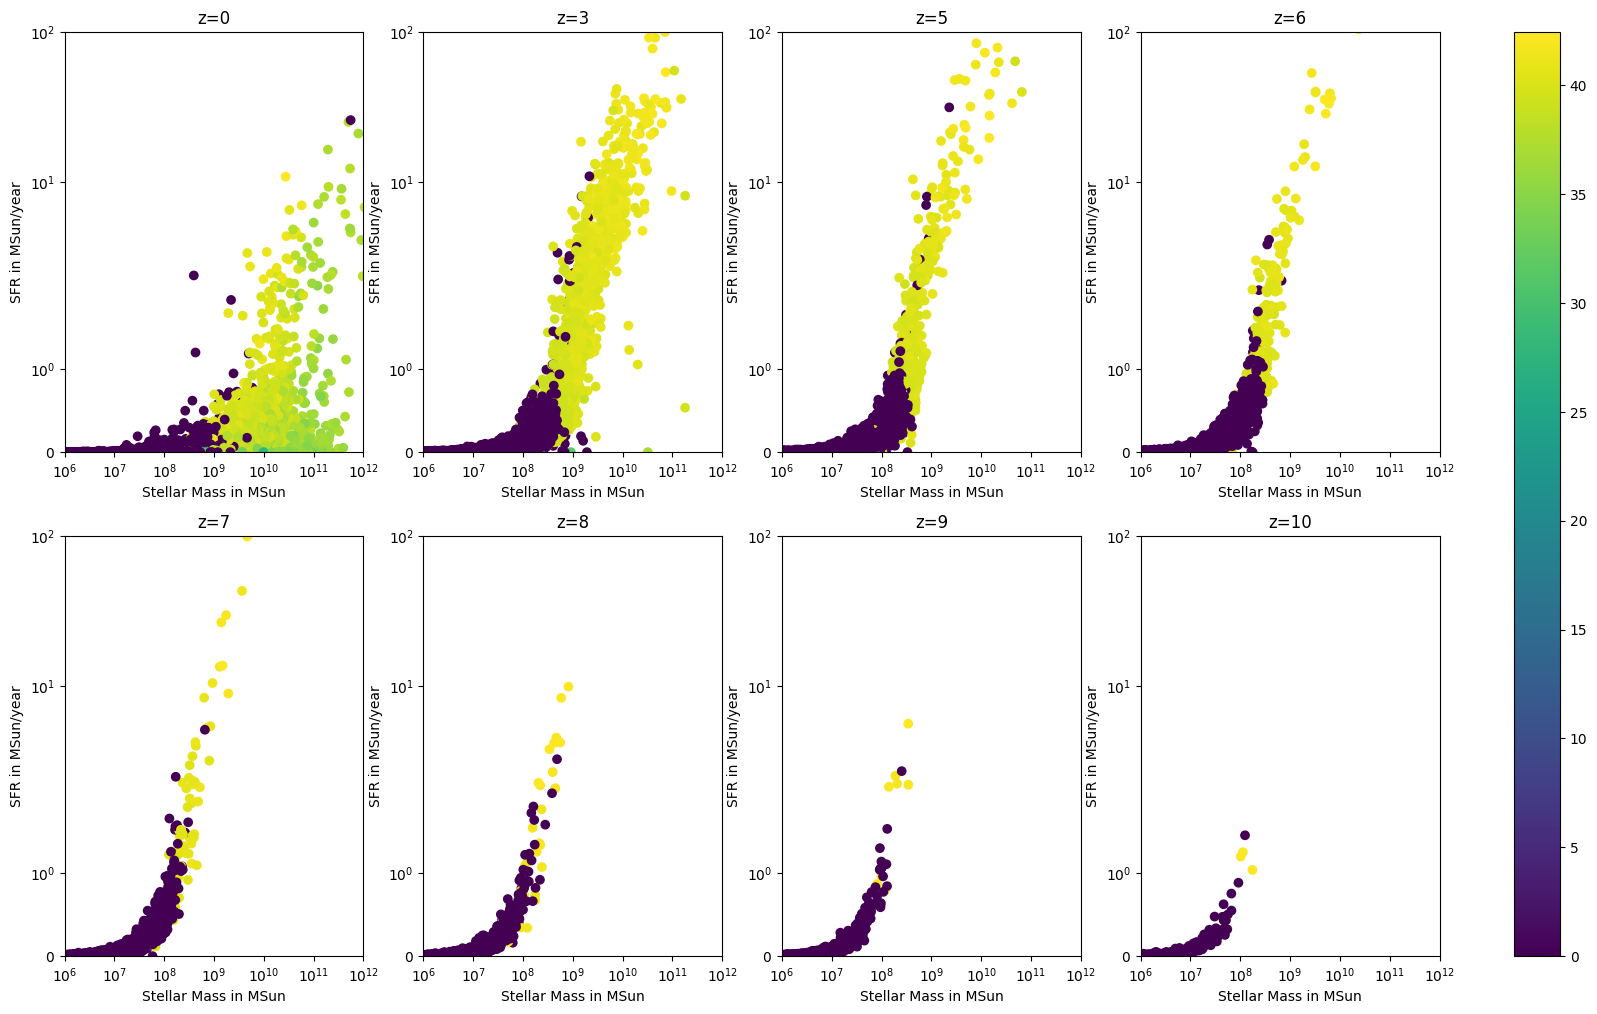

In [12]:
#observations
"""
df_data = pd.read_csv("../..\Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
data_stellar_mass = 10**df_data['stellar mass'].to_numpy()
data_sfr = 10**df_data['SFR'].to_numpy()
    
"""
#simulations

sim_list = np.array(['TNG50'])
snapshot_num = np.array([99,25,17,13,11,8,6,4])
snapshot_name = np.array(['z=0','z=3','z=5','z=6','z=7','z=8','z=9','z=10'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 4
rows = 2
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(22, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[0])+"/catalog_Habouzit_"+str(sim_list[0])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units_central.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','central','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['SFR'].to_numpy()
    lum = df['XrayLum'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    """ 
    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
        lum = np.delete(lum, np.where(zero_rows)[0])
    """
    
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    pcm = axes[i][j].scatter(stellar_mass, sfr, c=lum)
    axes[i][j].set_xlabel(r'Stellar Mass in MSun')
    axes[i][j].set_xlim([10**6, 10**12])
    axes[i][j].set_ylim([0, 10**2])
    axes[i][j].set_ylabel(r'SFR in MSun/year')
    axes[i][j].set_xscale('symlog')
    axes[i][j].set_yscale('symlog')
    axes[i][j].set_title(str(snapshot_name[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 4:
        i +=1
        j = j-4
    

fig.colorbar(pcm, ax=axes)
#fig.tight_layout()
fig.subplots_adjust(right=0.75)
plt.savefig('Figures/stellarMass_vs_sfr_tng50')
plt.show()

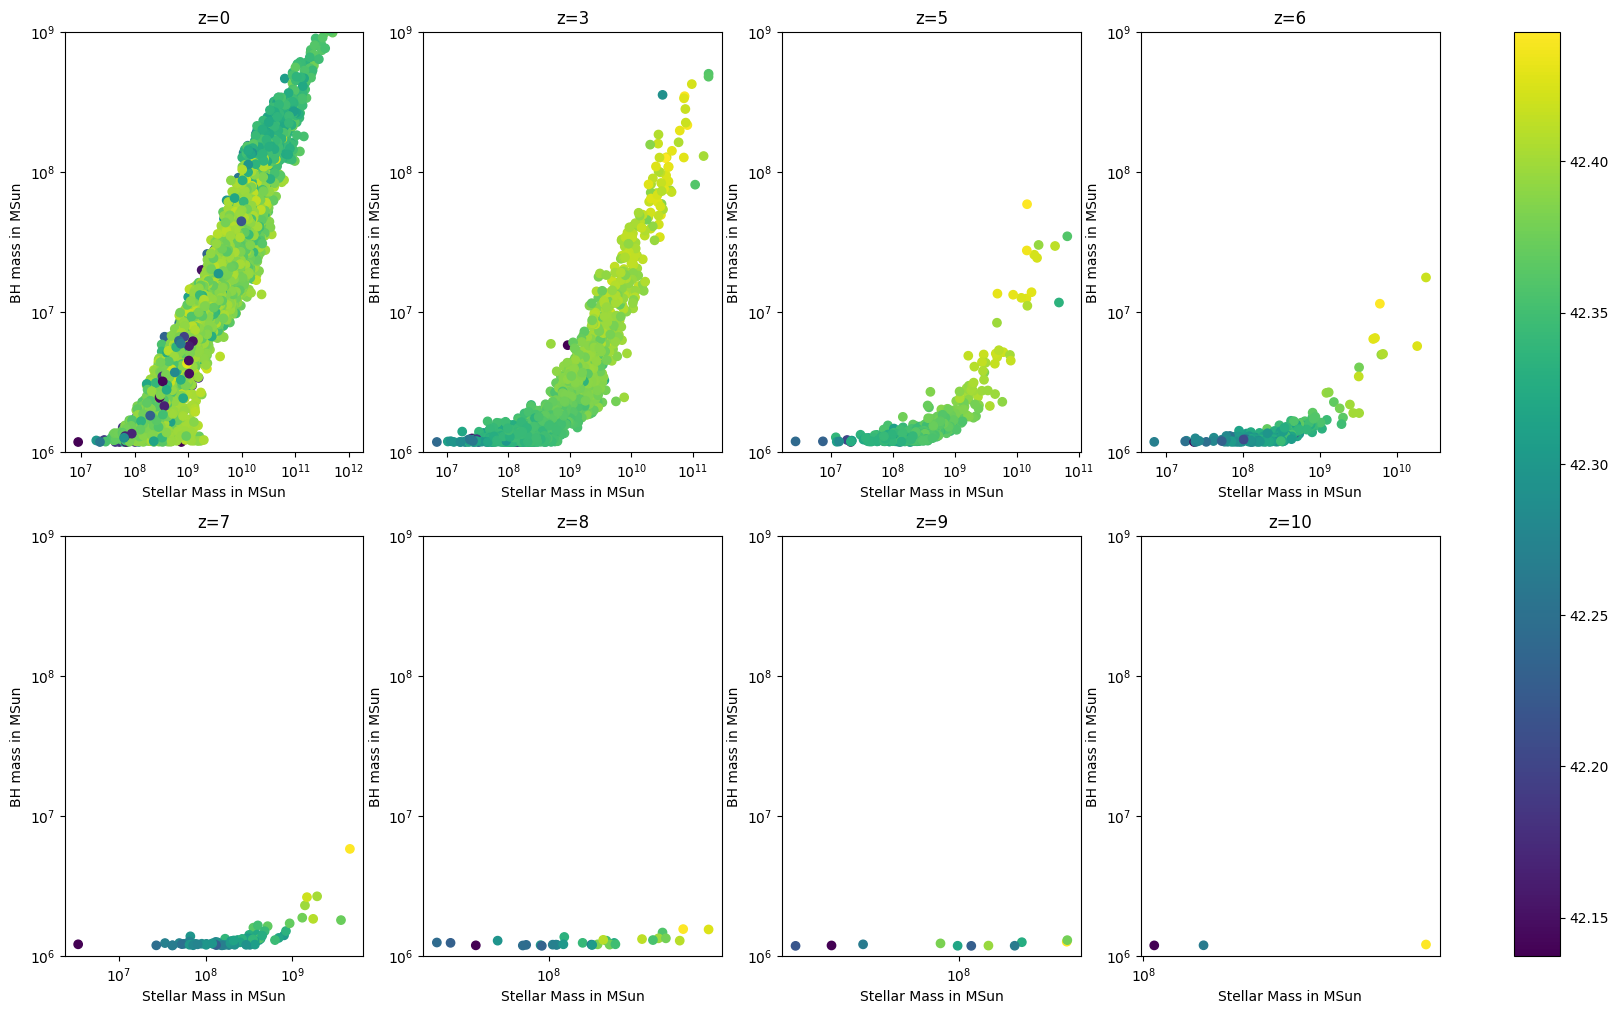

In [21]:
#observations
"""
df_data = pd.read_csv("../..\Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
data_stellar_mass = 10**df_data['stellar mass'].to_numpy()
data_sfr = 10**df_data['SFR'].to_numpy()
    
"""
#simulations

sim_list = np.array(['TNG50'])
snapshot_num = np.array([99,25,17,13,11,8,6,4])
snapshot_name = np.array(['z=0','z=3','z=5','z=6','z=7','z=8','z=9','z=10'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 4
rows = 2
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(22, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[0])+"/catalog_Habouzit_"+str(sim_list[0])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units_central.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','central','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['massBH'].to_numpy()
    lum = df['XrayLum'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    
    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
        lum = np.delete(lum, np.where(zero_rows)[0])
    
    
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    pcm = axes[i][j].scatter(stellar_mass, sfr, c=lum)
    axes[i][j].set_xlabel(r'Stellar Mass in MSun')
    #axes[i][j].set_xlim([10**6, 10**12])
    axes[i][j].set_ylim([10**6, 10**9])
    axes[i][j].set_ylabel(r'BH mass in MSun')
    axes[i][j].set_xscale('symlog')
    axes[i][j].set_yscale('symlog')
    axes[i][j].set_title(str(snapshot_name[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 4:
        i +=1
        j = j-4
    

fig.colorbar(pcm, ax=axes)
#fig.tight_layout()
fig.subplots_adjust(right=0.75)
plt.savefig('Figures/stellarMass_vs_bhMass_tng50')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[7.67960403e+37 2.78758932e+36 4.48547286e+37 ... 2.27477189e+34
 1.63405675e+32 1.01524739e+24] [8.00460511e+08 4.38605447e+08 2.96604990e+08 ... 1.26542442e+06
 1.18209846e+06 1.18099188e+06]
[5.99751789e+44 5.34571492e+44 1.49516576e+44 ... 1.38328392e+42
 7.56245433e+41 4.78277789e+38] [2.82259404e+08 1.53455654e+07 8.30346915e+06 ... 1.43049321e+06
 1.47976469e+06 1.20258819e+06]
[4.78337092e+44 2.22711194e+43 3.70640403e+43 4.86583728e+42
 3.10434441e+42 6.53788899e+44 2.68821812e+44 1.47163330e+43
 5.63290833e+44 3.25082380e+44 4.36724914e+42 3.43336925e+42
 6.04850600e+35 7.90898899e+41 6.32428366e+42 4.68137502e+44
 5.52422383e+42 1.44307287e+41 1.48424284e+42 7.41776564e+44
 1.40377024e+44 2.73515264e+44 1.93580973e+42 1.69981586e+42
 9.70655323e+43 1.13586392e+43 2.24482001e+44 1.42039546e+44
 4.39535723e+42 4.91133863e+43 7.02348640e+43 8.87652826e+42
 7.15919784e+43 2.99212340e+42 3.12904423e+44 1.17036044e+42
 6.04708270e+43 2.70237323e+43 2.19362199e+43 3.46852106e+42
 2

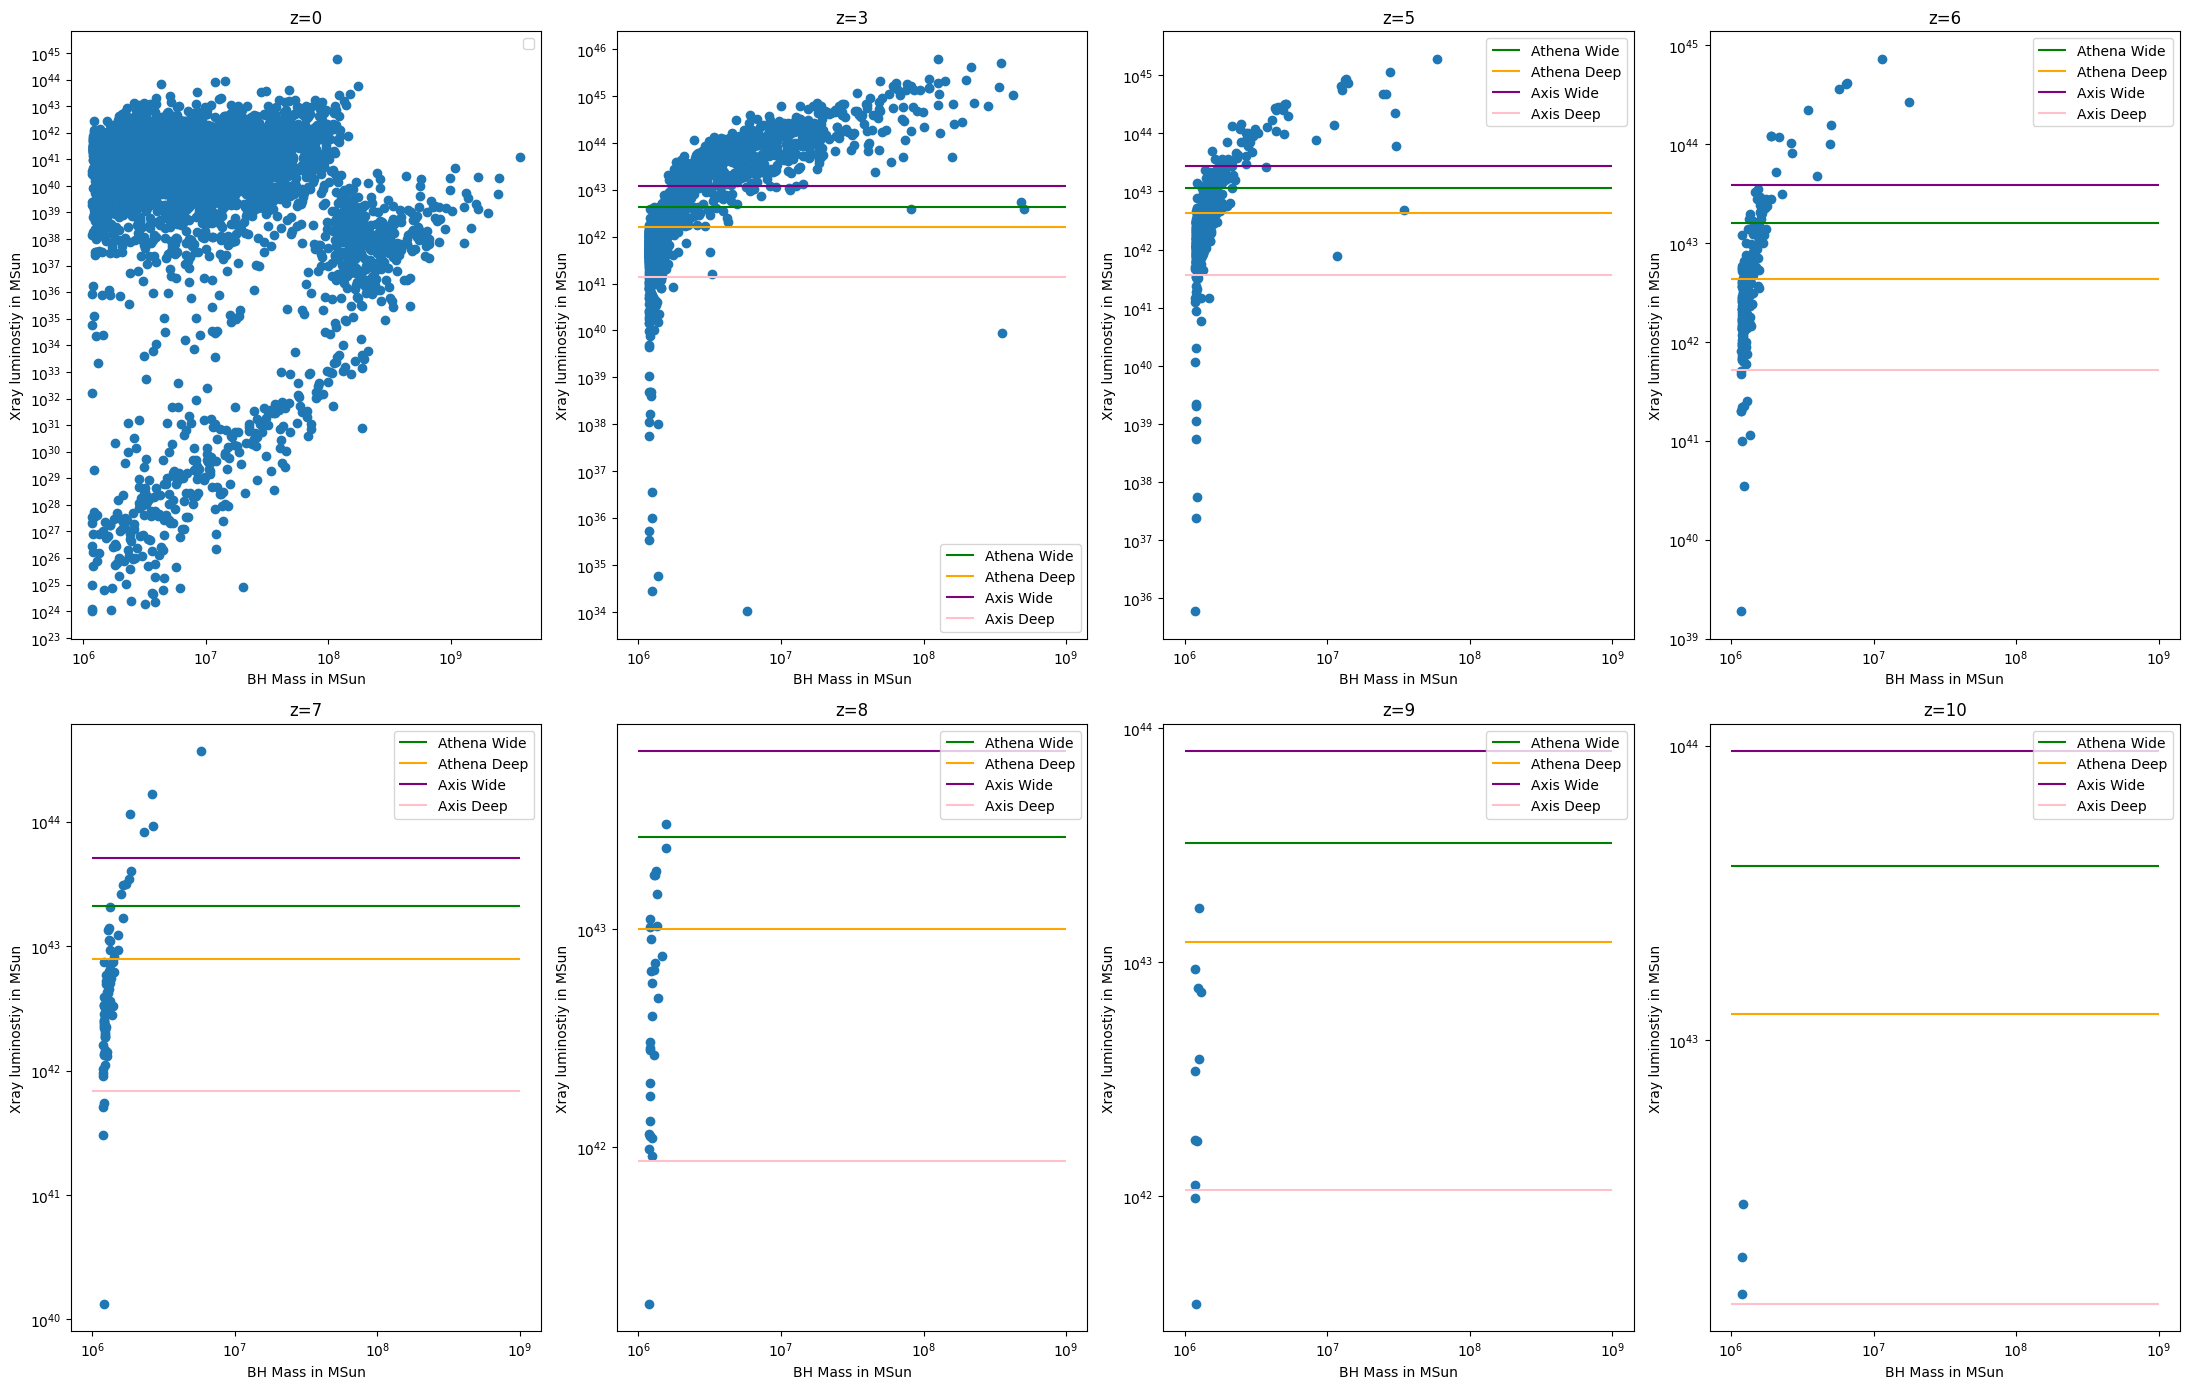

In [9]:
#observations
"""
df_data = pd.read_csv("../..\Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
data_stellar_mass = 10**df_data['stellar mass'].to_numpy()
data_sfr = 10**df_data['SFR'].to_numpy()
    
"""
#simulations

sim_list = np.array(['TNG50'])
snapshot_num = np.array([99,25,17,13,11,8,6,4])
snapshot_name = np.array(['z=0','z=3','z=5','z=6','z=7','z=8','z=9','z=10'])
athena_wide_lower = [0, 4.28885980721e+42,1.12985384708e+43,1.5762108588e+43,2.08015002867e+43,
               2.63514469431e+43,3.23853684955e+43,3.8867721315e+43]
athena_deep_lower = [0,1.62350175723e+42,4.27694023262e+42,4.27694023262e+42,7.8741842323e+42,
               9.97505685447e+42,1.22591329688e+43,1.22591329688e+43]
axis_wide_lower = [0,1.22591329688e+43,2.777345264133678e+43,3.8745557890184457e+43,5.113311642675746e+43,
              6.477569338687406e+43,7.960795110842346e+43, 9.554251817674262e+43]
axis_deep_lower = [0,1.4059567933326986e+41,3.7038414944418256e+41,5.16707111975603e+41,6.81906426281589e+41,
              8.638425481189919e+41,1.061644140577702e+42,1.274146026698138e+42]
athena_wide_upper = [0,1.13298312194e+43,2.98472180614e+43,4.16385794807e+43,5.49510820947e+43,
                     6.96123118204e+43,8.55520524163e+43,1.02676408691e+44]
athena_deep_upper = [0,6.60445762771e+42,1.73987311173e+43,2.4272226879e+43,3.2032435988e+43,
                     4.05788537252e+43,4.98705491904e+43,5.98527883982e+43]
axis_wide_upper = [0,5.98527883982e+43,7.6056820386805635e+43,1.0610362259585823e+44,1.4002660389797069e+44,
                   1.773864179213963e+44,2.180041393126391e+44,2.616405039053823e+44]
axis_deep_upper = [0,4.608820749903397e+41,1.2141441056288032e+42,1.69380059941308e+42,2.235335041476887e+42,
                   2.8317338621643685e+42,3.4801407605916625e+42,4.176736208467363e+42]
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 4
rows = 2
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(22, 14))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[0])+"/catalog_Habouzit_"+str(sim_list[0])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units_central.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','central','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    df['XrayLum'] = 10**(df['XrayLum'])
    #lum = df['XrayLum'].to_numpy()
    stellar_mass = df['massBH'].to_numpy()
    sfr = df['XrayLum'].to_numpy()
    


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (stellar_mass <= 0)

    
    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
        #lum = np.delete(lum, np.where(zero_rows)[0])
    
    print(sfr,stellar_mass)
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log')
    
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log')
    pcm = axes[i][j].scatter(stellar_mass, sfr)
    if x >0:
        axes[i][j].hlines(athena_wide[x],xmin=10**6, xmax=10**9, label='Athena Wide', color='green')
        axes[i][j].hlines(athena_deep[x],xmin=10**6, xmax=10**9, label='Athena Deep', color='orange')
        axes[i][j].hlines(axis_wide[x],xmin=10**6, xmax=10**9, label='Axis Wide', color='purple')
        axes[i][j].hlines(axis_deep[x],xmin=10**6, xmax=10**9, label='Axis Deep', color='pink')
    axes[i][j].set_xlabel(r'BH Mass in MSun')
    #axes[i][j].set_xlim([10**6, 10**12])
    #axes[i][j].set_ylim([10**6, 10**9])
    axes[i][j].set_ylabel(r'Xray luminostiy in MSun')
    axes[i][j].set_xscale('symlog')
    axes[i][j].set_yscale('symlog')
    axes[i][j].set_title(str(snapshot_name[x]))
    axes[i][j].legend()
    x += 1
    j += 1
    if x == 4:
        i +=1
        j = j-4
    

#fig.colorbar(pcm, ax=axes)
fig.tight_layout()
#fig.subplots_adjust(right=0.75)
plt.savefig('Figures/luminosity_vs_bhMass_tng50')
plt.show()